## Privacy of Student Depression Data
### A popular Kaggle dataset claims to have taken privacy into account. Let's test that with some of the privacy metrics we studied.

# The Data
Overview 

In [156]:
import pandas as pd
import numpy as np

file_path = "./student_depression_dataset.csv"

df = pd.read_csv(file_path)


display(df)

,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,2,Male,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,'5-6 hours',Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,8,Female,24.0,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,'5-6 hours',Moderate,BSc,No,3.0,2.0,Yes,0
2,26,Male,31.0,Srinagar,Student,3.0,0.0,7.03,5.0,0.0,'Less than 5 hours',Healthy,BA,No,9.0,1.0,Yes,0
3,30,Female,28.0,Varanasi,Student,3.0,0.0,5.59,2.0,0.0,'7-8 hours',Moderate,BCA,Yes,4.0,5.0,Yes,1
4,32,Female,25.0,Jaipur,Student,4.0,0.0,8.13,3.0,0.0,'5-6 hours',Moderate,M.Tech,Yes,1.0,1.0,No,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27896,140685,Female,27.0,Surat,Student,5.0,0.0,5.75,5.0,0.0,'5-6 hours',Unhealthy,'Class 12',Yes,7.0,1.0,Yes,0
27897,140686,Male,27.0,Ludhiana,Student,2.0,0.0,9.40,3.0,0.0,'Less than 5 hours',Healthy,MSc,No,0.0,3.0,Yes,0
27898,140689,Male,31.0,Faridabad,Student,3.0,0.0,6.61,4.0,0.0,'5-6 hours',Unhealthy,MD,No,12.0,2.0,No,0
27899,140690,Female,18.0,Ludhiana,Student,5.0,0.0,6.88,2.0,0.0,'Less than 5 hours',Healthy,'Class 12',Yes,10.0,5.0,No,1


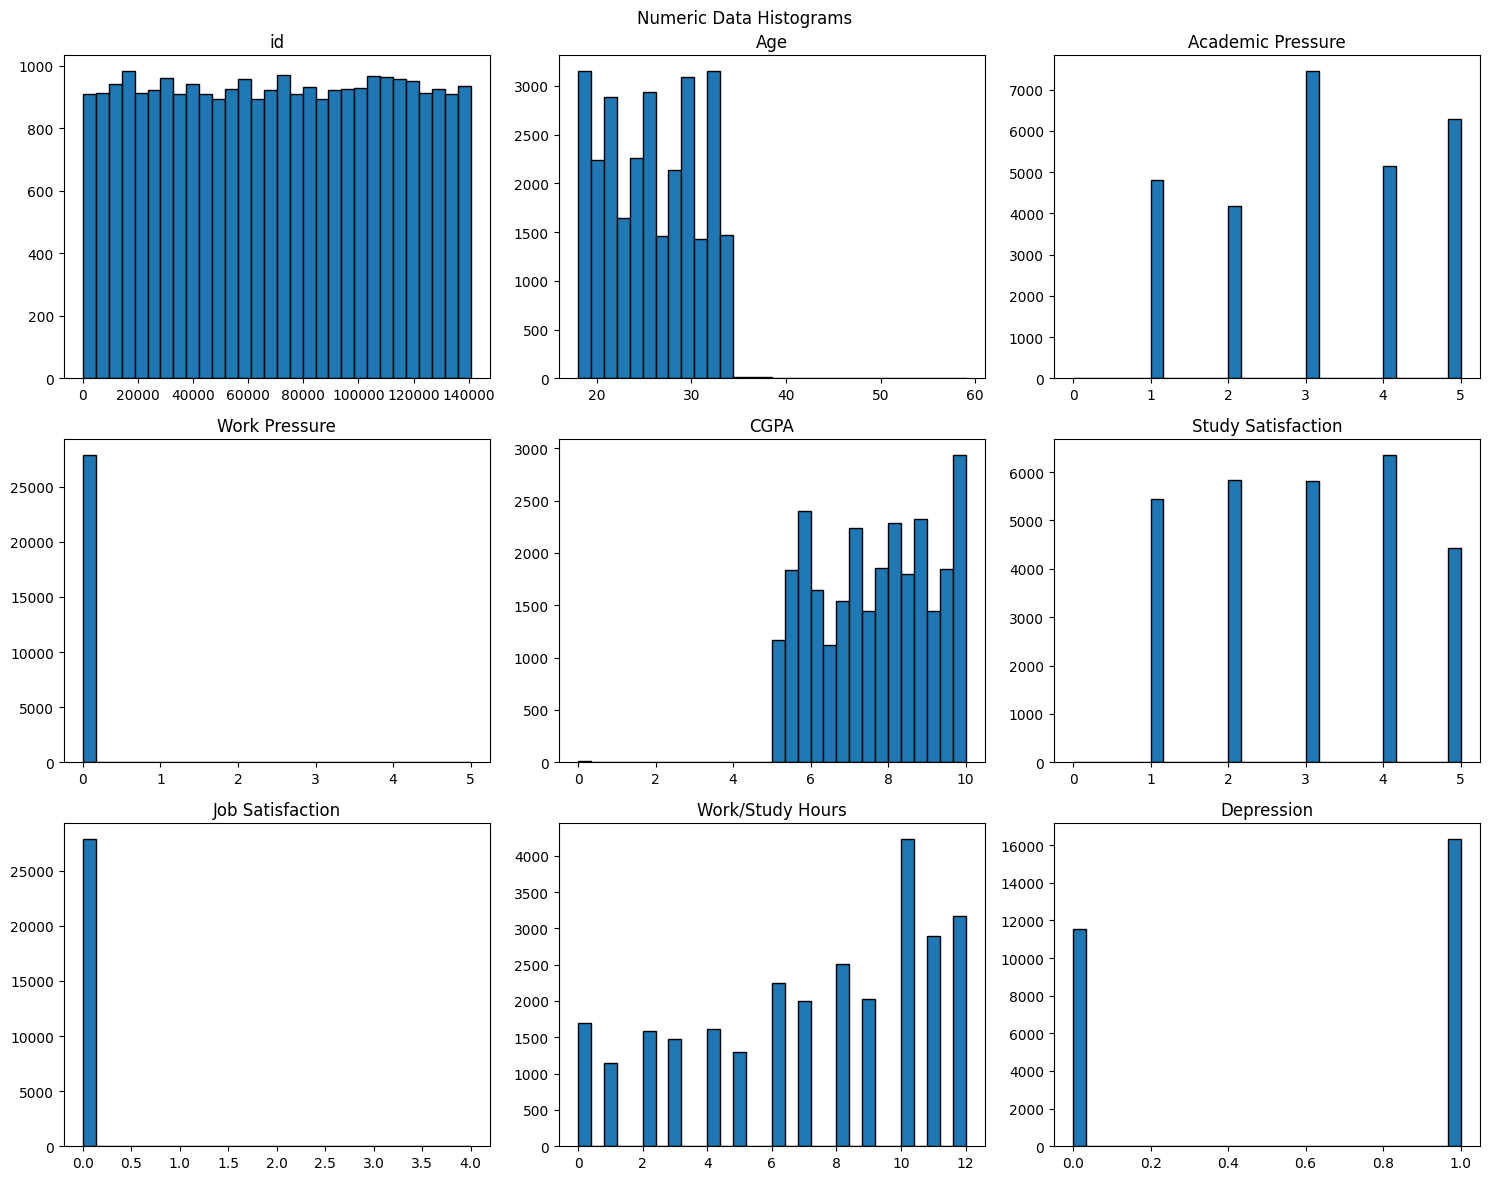

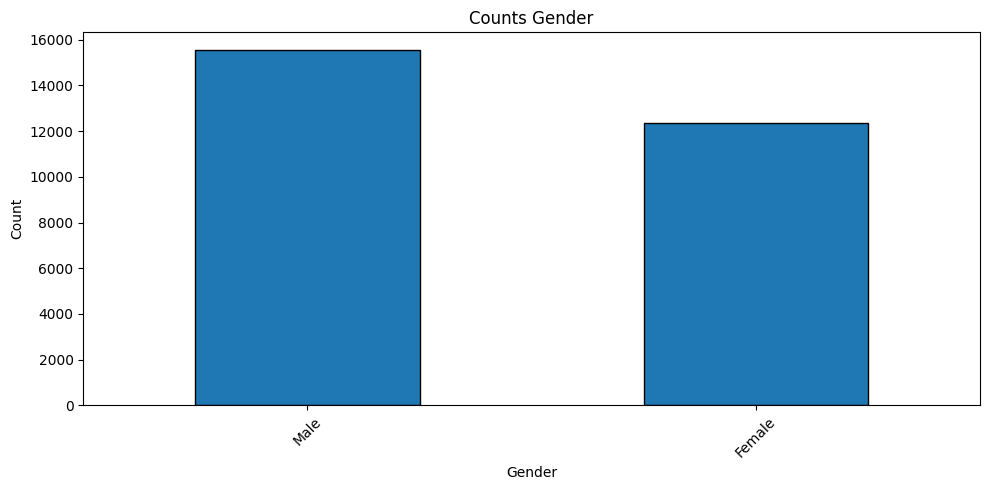

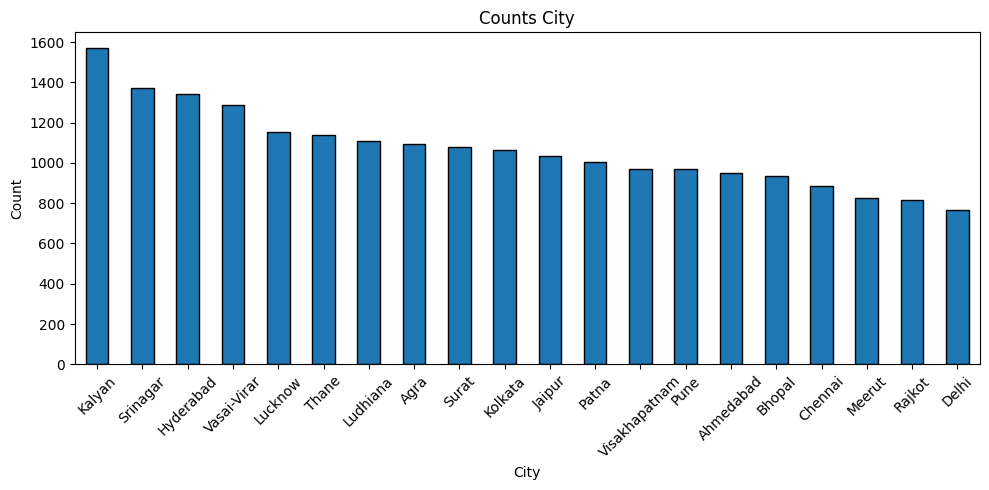

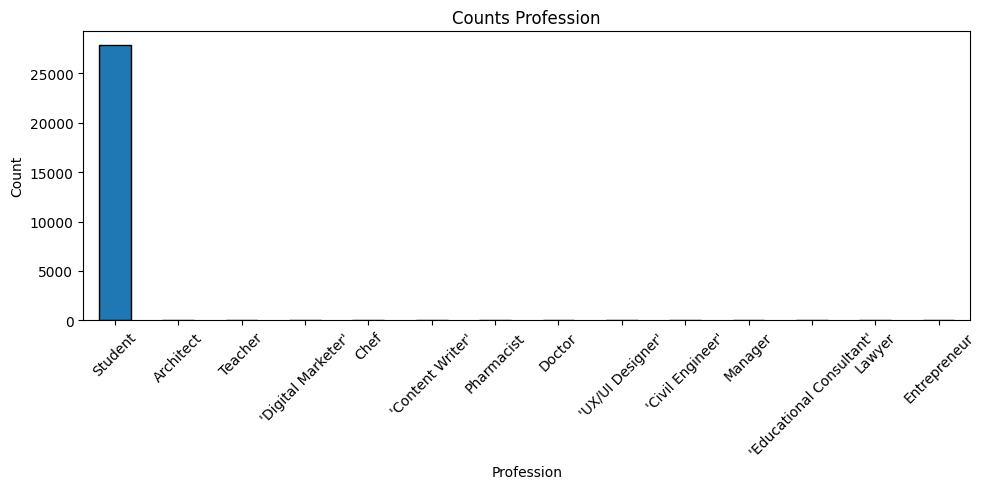

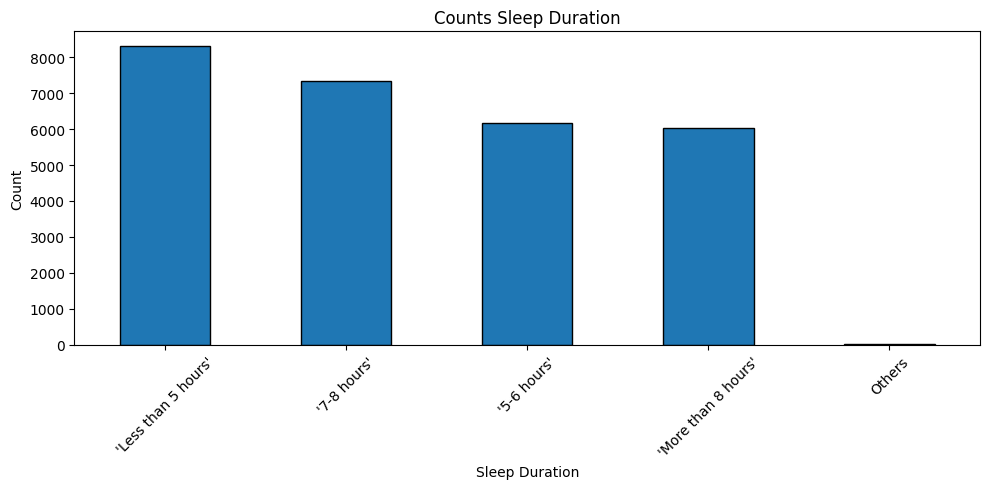

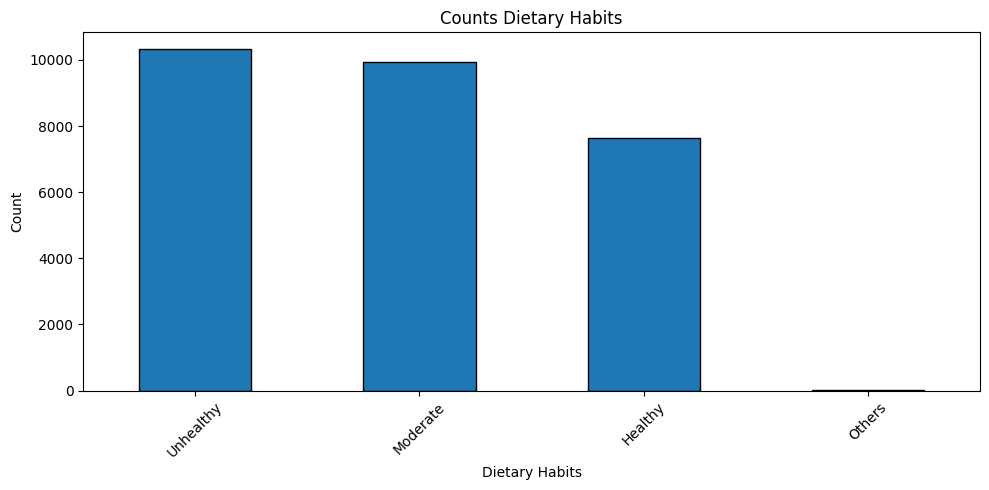

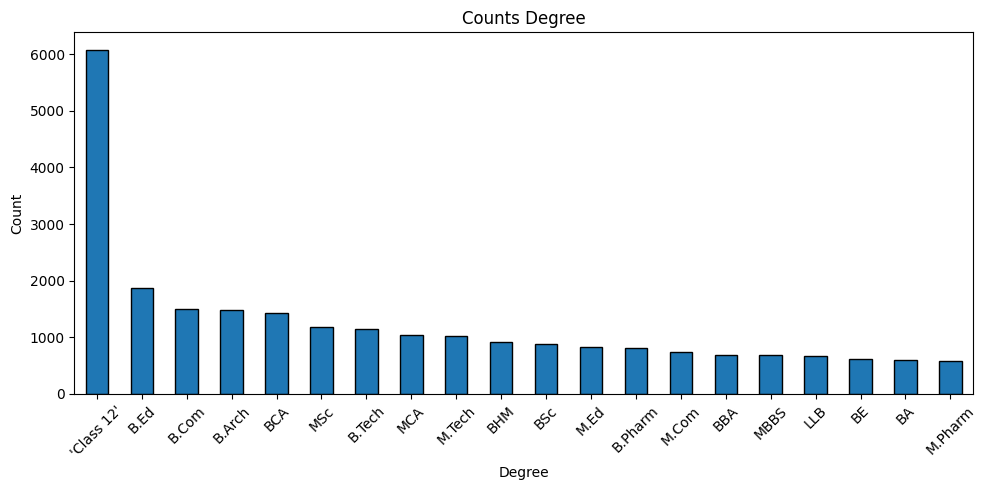

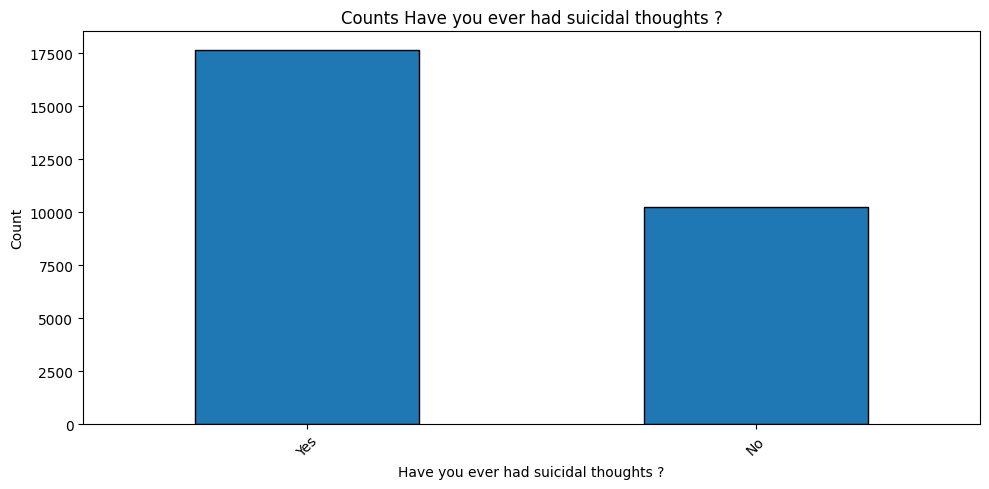

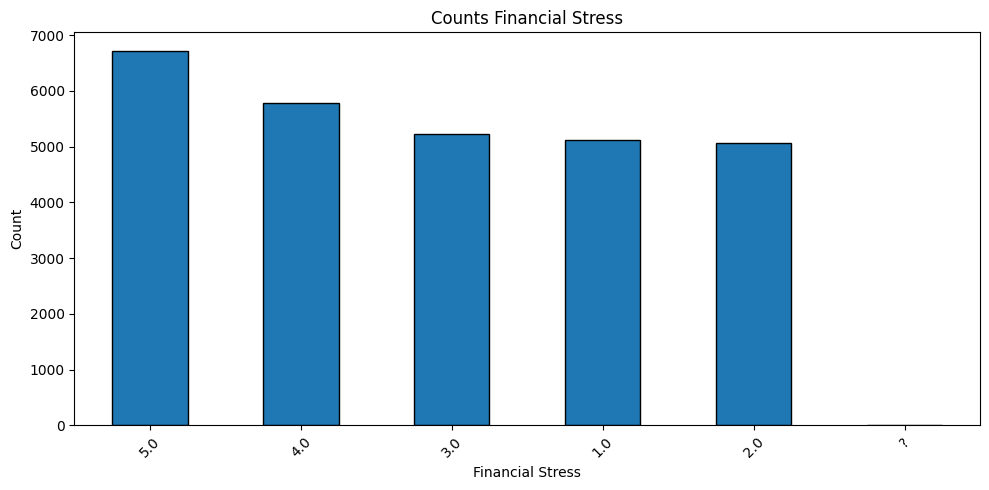

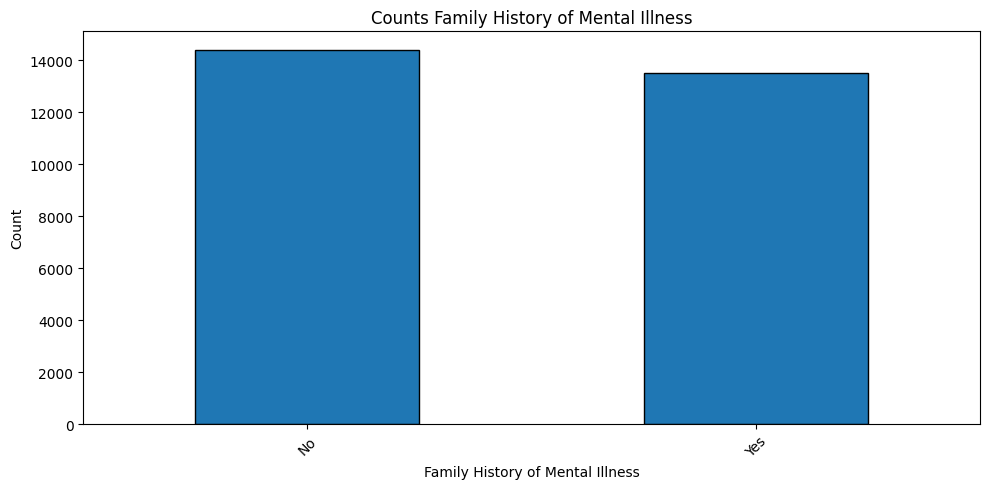

In [157]:
# Plot histograms for all numeric columns
# Separate numeric and categorical columns
numeric_cols = df.select_dtypes(include=['number']).columns
categorical_cols = df.select_dtypes(include=['object', 'category']).columns

# Plot numeric histograms
df[numeric_cols].hist(figsize=(15, 12), bins=30, edgecolor='black', grid=0)
plt.suptitle('Numeric Data Histograms')
plt.tight_layout()
plt.show()

# Plot bar charts for categorical columns (top 20 values only to avoid clutter)
for col in categorical_cols:
    plt.figure(figsize=(10, 5))
    df[col].value_counts().nlargest(20).plot(kind='bar', edgecolor='black')
    plt.title(f'Counts {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

### $k$-Anonymity

In [158]:
from finalPrivacyFuncs import (
  k_anonymity,
  Mondrian,
  Mondrian_choose_cut_first_split,
  Mondrian_choose_dim_highest_distinct,
  discernability_cost,
)

In [159]:
qID = ['Gender', 'Age', 'City']

k, grouped = k_anonymity(df, qID)
print(k)
display(grouped)

1


,Gender,Age,City,count
0,Female,18.0,Agra,17
1,Female,18.0,Ahmedabad,21
2,Female,18.0,Bangalore,22
3,Female,18.0,Bhopal,20
4,Female,18.0,Chennai,30
...,...,...,...,...
1088,Male,43.0,Rajkot,1
1089,Male,46.0,Nashik,1
1090,Male,49.0,Nagpur,1
1091,Male,54.0,Agra,1


In [160]:
# In this dataset there are 71 rows that are unique identifiers

desired_k = 10

for i in range(1, 10):
  print(i, grouped['count'].loc[grouped['count'] == i].count())

nonprivate_classes = grouped['count'].loc[grouped['count'] < desired_k].count()
print(f'There are { nonprivate_classes } equivalency classes with k < 10.')

# Join dataset so each row has the k-value of its equivalency class

df_with_counts = df.merge(grouped, how='right')
nonprivate_rows = df_with_counts['count'].loc[df_with_counts['count'] < desired_k].count()
print(f'This is {nonprivate_rows} individuals with >10% risk of identity disclosure, {nonprivate_rows * 100 / len(df):2.2f}% of the table.')
# display(df_with_counts)

1 71
2 2
3 1
4 5
5 4
6 6
7 12
8 19
9 17
There are 137 equivalency classes with k < 10.
This is 543 individuals with >10% risk of identity disclosure, 1.95% of the table.


In [161]:
# Fixing this
desired_k = 10

# Suppressing rows
# kanon_df = df_with_counts.drop(
#   df_with_counts[df_with_counts['count'] < desired_k].index
# )
# display(kanon_df)

generalized_df, boundaries = Mondrian(df, qID, desired_k, Mondrian_choose_dim_highest_distinct, Mondrian_choose_cut_first_split)

display(generalized_df)



,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,19051,"(Female,)","(18.0, 18.0)","(Agra,)",Student,3.0,0.0,6.03,4.0,0.0,Others,Unhealthy,BA,Yes,12.0,5.0,No,1
1,23427,"(Female,)","(18.0, 18.0)","(Agra,)",Student,4.0,0.0,7.53,3.0,0.0,'More than 8 hours',Healthy,'Class 12',Yes,0.0,5.0,Yes,1
2,29406,"(Female,)","(18.0, 18.0)","(Agra,)",Student,5.0,0.0,5.6,1.0,0.0,'5-6 hours',Moderate,'Class 12',No,9.0,1.0,No,0
3,33909,"(Female,)","(18.0, 18.0)","(Agra,)",Student,5.0,0.0,7.92,2.0,0.0,'Less than 5 hours',Moderate,'Class 12',No,5.0,4.0,Yes,1
4,34281,"(Female,)","(18.0, 18.0)","(Agra,)",Student,2.0,0.0,7.8,3.0,0.0,'7-8 hours',Healthy,'Class 12',Yes,8.0,1.0,Yes,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27896,92312,"(Male, Female)","(39.0, 59.0)","(Pune, Srinagar, Nashik, Vadodara, Vasai-Virar...",Student,5.0,0.0,5.6,5.0,0.0,'More than 8 hours',Healthy,M.Ed,No,2.0,5.0,No,0
27897,111622,"(Male, Female)","(39.0, 59.0)","(Pune, Srinagar, Nashik, Vadodara, Vasai-Virar...",Student,5.0,0.0,9.56,2.0,0.0,'5-6 hours',Moderate,PhD,No,4.0,2.0,Yes,0
27898,126970,"(Male, Female)","(39.0, 59.0)","(Pune, Srinagar, Nashik, Vadodara, Vasai-Virar...",Student,3.0,0.0,5.32,4.0,0.0,'7-8 hours',Unhealthy,'Class 12',No,1.0,4.0,Yes,1
27899,130893,"(Male, Female)","(39.0, 59.0)","(Pune, Srinagar, Nashik, Vadodara, Vasai-Virar...",Student,3.0,0.0,5.85,1.0,0.0,'5-6 hours',Moderate,'Class 12',No,11.0,5.0,Yes,1


In [162]:
display(boundaries)
generalized_k, generalized_grouped = k_anonymity(generalized_df, qID)
print(f'The generalized table satisfies {generalized_k}-Anonymity')
display(generalized_grouped['count'])

,Gender,Age,City,k
0,"(Female,)","(18.0, 18.0)","(Agra,)",17
1,"(Female,)","(18.0, 18.0)","(Ahmedabad,)",21
2,"(Female,)","(18.0, 18.0)","(Bangalore,)",22
3,"(Female,)","(18.0, 18.0)","(Bhopal,)",20
4,"(Female,)","(18.0, 18.0)","(Chennai,)",30
...,...,...,...,...
963,"(Male, Female)","(32.0, 32.0)","(Rajkot,)",27
964,"(Male, Female)","(32.0, 32.0)","(Varanasi,)",28
965,"(Male, Female)","(34.0, 34.0)","(Nagpur,)",32
966,"(Male, Female)","(35.0, 38.0)","(Varanasi, Srinagar, Mumbai, Thane, Patna, Sur...",11


The generalized table satisfies 10-Anonymity


0      17
1      21
2      22
3      20
4      30
       ..
963    27
964    28
965    32
966    11
967    12
Name: count, Length: 968, dtype: int64

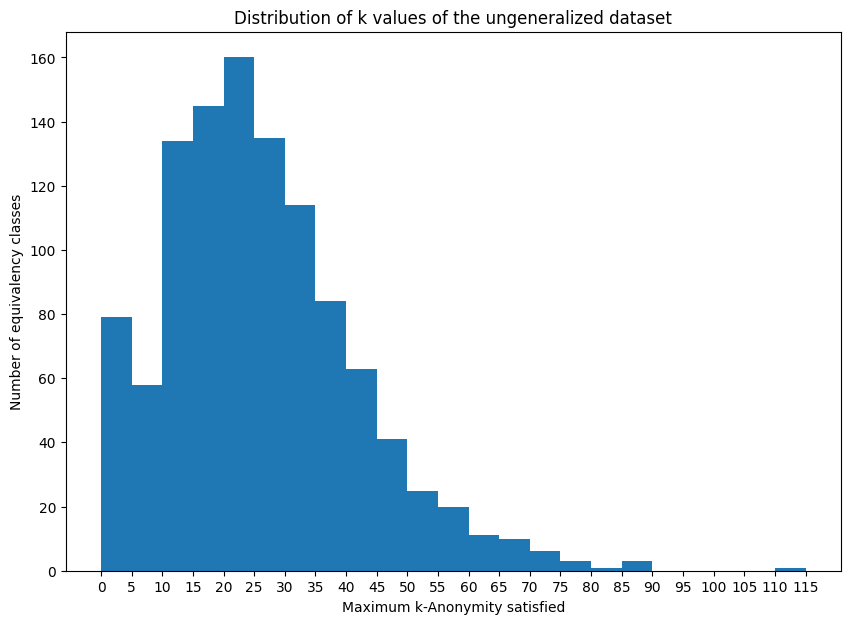

The discernibility cost of the original table is 979251


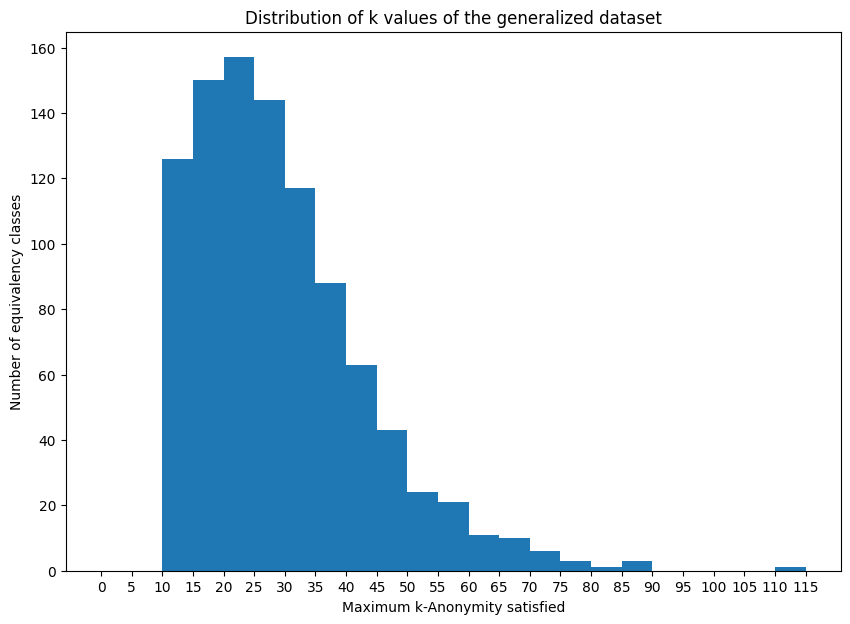

The discernibility cost of the generalized table is 996127, an increase of 16876


In [163]:
# Comparison between k values before and after suppressing rows
import matplotlib.pyplot as plt

bins = range(0,120, 5)

fig = plt.figure(figsize=(10, 7))
plt.xlabel('Maximum k-Anonymity satisfied')
plt.ylabel('Number of equivalency classes')
plt.title('Distribution of k values of the ungeneralized dataset')
plt.xticks(range(0, 120, 5))

plt.hist(grouped['count'], bins=bins)
plt.show()

cost = discernability_cost(grouped)
print(f'The discernibility cost of the original table is {cost}')

fig = plt.figure(figsize=(10, 7))
plt.xlabel('Maximum k-Anonymity satisfied')
plt.ylabel('Number of equivalency classes')
plt.title('Distribution of k values of the generalized dataset')
plt.xticks(range(0, 120, 5))

plt.hist(generalized_grouped['count'], bins=bins)
plt.show()

generalized_cost = discernability_cost(generalized_grouped)
print(f'The discernibility cost of the generalized table is {generalized_cost}, an increase of {generalized_cost - cost}')

# l-diversity
Looking at sensitive values

,Gender,Age,City,n unique Sleep Duration
79,Female,20.0,Nashik,2
242,Female,26.0,Bangalore,2
259,Female,26.0,Nashik,2
436,Female,32.0,Meerut,2
438,Female,32.0,Nagpur,2
636,Male,22.0,Faridabad,2


,Gender,Age,City,n unique Dietary Habits
79,Female,20.0,Nashik,1


,Gender,Age,City,n unique Have you ever had suicidal thoughts ?
936,Male,32.0,Faridabad,1


,Gender,Age,City,n unique Depression
5,Female,18.0,Delhi,1
117,Female,21.0,Varanasi,1
259,Female,26.0,Nashik,1
267,Female,26.0,Varanasi,1


,Gender,Age,City,n unique Family History of Mental Illness
259,Female,26.0,Nashik,1


,Gender,Age,City,n unique Financial Stress
79,Female,20.0,Nashik,2
258,Female,26.0,Nagpur,2
559,Male,19.0,Nashik,2
636,Male,22.0,Faridabad,2


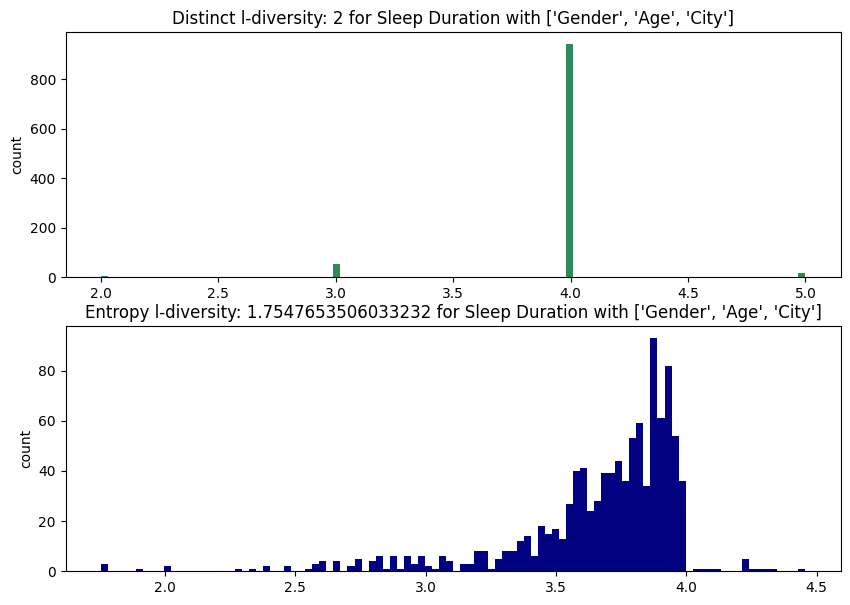

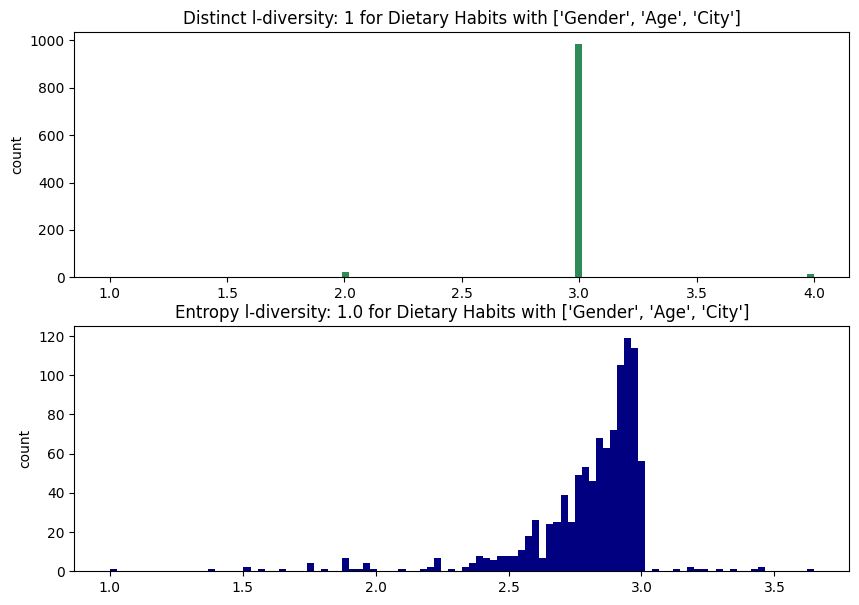

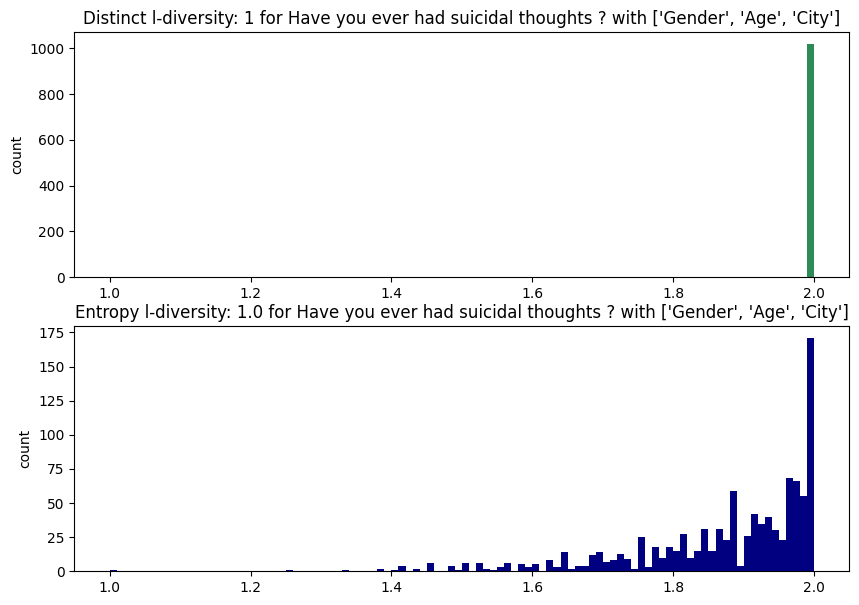

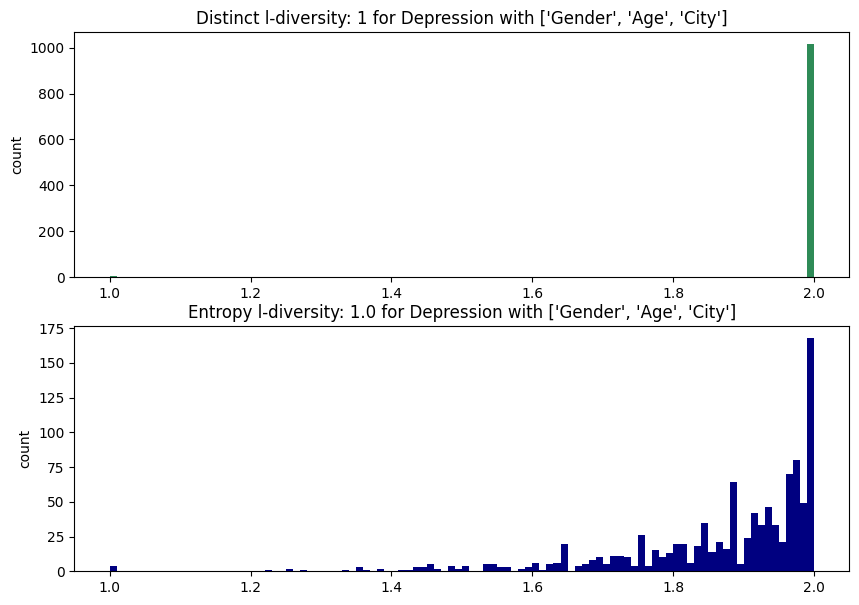

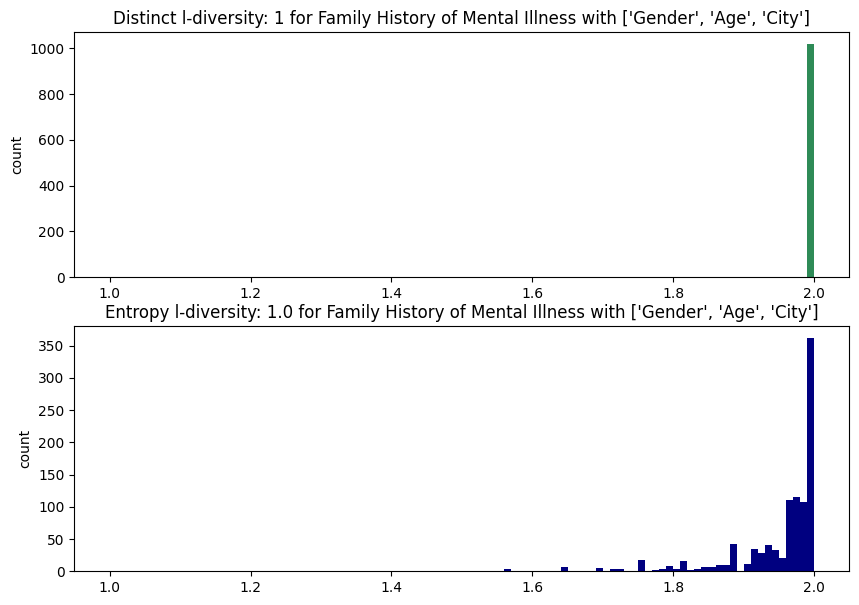

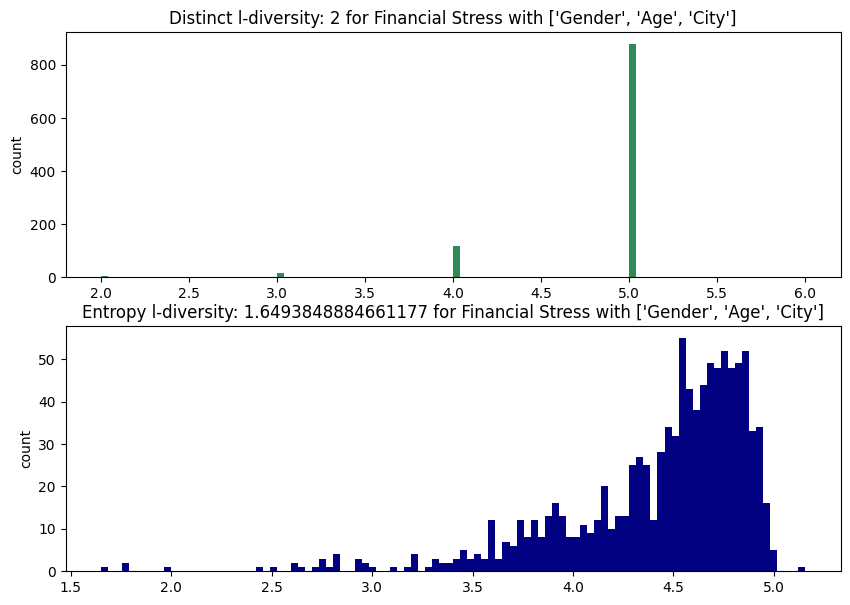

In [164]:
from finalPrivacyFuncs import entropy_l_diversity, distinct_l_diversity

## Qid's 
qID = ['Gender','Age','City']

#qID = ['Age', 'Gender']
#qID = ['City']


## Data wash
## Remove entries with age 35 and over (small number)


df = df[df['Age'] < 35]

## remove "wired" cities
wired_cities = ['City',"'Less Delhi'","'Less than 5 Kalyan'",'3.0', 'M.Com', 'M.Tech', 'ME','Saanvi', 'Gaurav','Harsh', 'Khaziabad', 'Kibara', 'Mihir', 'Mira', 'Nalini','Nalyan', 'Nandini','Rashi','Reyansh','Vaanya','Harsha','Bhavna'    ]

df = df[~df['City'].isin(wired_cities)]




## List of sensitive attributes
sensAttrs = ['Sleep Duration', 'Dietary Habits', 'Have you ever had suicidal thoughts ?','Depression','Family History of Mental Illness','Financial Stress']


## Loop over all sensitive attributes
for sensAttr in sensAttrs:
    
    ## Calculate distinct and entropy min l and l's for all equivalence classes  
    distinct_l,df_distinct_l = distinct_l_diversity(df,qID, sensAttr)
    entropy_l,df_entropy_l = entropy_l_diversity(df,qID, sensAttr)

    ## Dig out the column names with l's for later use
    distinct_column_name=(df_distinct_l.columns[-1])
    entropy_column_name=(df_entropy_l.columns[-1])

    ## Set a number of bins (not overwhelming the calculation)
    bins = 100#len(df_distinct_l)
    
    ## Print out the l scores with lowest l
    display(df_distinct_l[df_distinct_l[distinct_column_name]==distinct_l])
    #diversity_scores = df.groupby(qID)[sensAttr].nunique()     
    #print(diversity_scores[diversity_scores == 1])

    ## Histogram plots
    fig = plt.figure(figsize=(10, 7))
    ax1 = fig.add_subplot(211)
    ax1.hist(df_distinct_l[distinct_column_name], bins=bins, color = 'seagreen')
    ax1.set_title(f"Distinct l-diversity: {distinct_l} for {sensAttr} with {qID}")
    ax1.set_ylabel('count')


    ax2 = fig.add_subplot(212)
    ax2.hist(df_entropy_l[entropy_column_name], bins=bins, color = 'navy')
    ax2.set_title(f"Entropy l-diversity: {entropy_l} for {sensAttr} with {qID}")
    ax2.set_ylabel('count')




## Sensitive values
